In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pandas as pd
plt.style.use('ggplot')

In [2]:
deaths = pd.read_csv('deaths.txt')
pumps = pd.read_csv('pumps.txt')
print deaths.head()
print pumps.head()

           X          Y
0  13.588010  11.095600
1   9.878124  12.559180
2  14.653980  10.180440
3  15.220570   9.993003
4  13.162650  12.963190
           X          Y
0   8.651201  17.891600
1  10.984780  18.517851
2  13.378190  17.394541
3  14.879830  17.809919
4   8.694768  14.905470


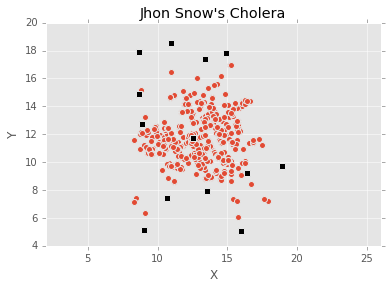

In [3]:
plt.plot(deaths['X'], deaths['Y'], 'o', lw=0, mew=1, mec='0.9', ms=6) # marker edge color/width, marker size
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')

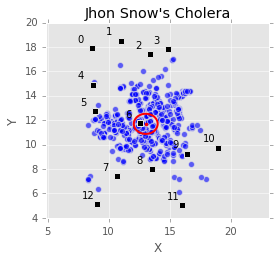

In [4]:
fig = plt.figure(figsize=(4, 3.5))
ax = fig.add_subplot(111)
plt.plot(deaths['X'], deaths['Y'], 'bo', lw=0, mew=1, mec='0.9', ms=6, alpha=0.6) # marker edge color/width, marker size
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')
from matplotlib.patches import Ellipse
e = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
            width=deaths.X.std(), height=deaths.Y.std(), lw=2, fc='None', ec='r', zorder=10)
ax.add_artist(e)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), 'r.', lw=2)
for i in pumps.index:
    plt.annotate(s='%d'%i, xy=(pumps[['X', 'Y']].loc[i]), xytext=(-15, 6), textcoords='offset points', color='k')


In [5]:
# calculate the nearing pump for each death
deaths['C'] = [np.argmin(norm(pumps - deaths.iloc[i,:2], axis=1)) for i in xrange(len(deaths))]
deaths.head()

,X,Y,C
0,13.588010,11.095600,6
1,9.878124,12.559180,5
2,14.653980,10.180440,9
3,15.220570,9.993003,9
4,13.162650,12.963190,6


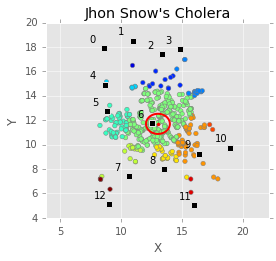

In [6]:
fig = plt.figure(figsize=(4, 3.5))
ax = fig.add_subplot(111)
plt.scatter(deaths['X'], deaths['Y'], marker='o', lw=0.5, color=plt.cm.jet(deaths.C/12), edgecolors='0.5')
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')
from matplotlib.patches import Ellipse
e = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
            width=deaths.X.std(), height=deaths.Y.std(), lw=2, fc='None', ec='r', zorder=10)
ax.add_artist(e)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), 'r.', lw=2)
for i in pumps.index:
    plt.annotate(s='%d'%i, xy=(pumps[['X', 'Y']].loc[i]), xytext=(-15, 6), textcoords='offset points', color='k')